In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import time

In [3]:
endpoint_url = 'http://api.open-notify.org/astros.json'

res = requests.get(endpoint_url)
res.content

b'{"message": "success", "people": [{"name": "Alexey Ovchinin", "craft": "ISS"}, {"name": "Nick Hague", "craft": "ISS"}, {"name": "Christina Koch", "craft": "ISS"}, {"name": "Alexander Skvortsov", "craft": "ISS"}, {"name": "Luca Parmitano", "craft": "ISS"}, {"name": "Andrew Morgan", "craft": "ISS"}], "number": 6}'

In [4]:
results = json.loads(res.content)
results

{'message': 'success',
 'people': [{'name': 'Alexey Ovchinin', 'craft': 'ISS'},
  {'name': 'Nick Hague', 'craft': 'ISS'},
  {'name': 'Christina Koch', 'craft': 'ISS'},
  {'name': 'Alexander Skvortsov', 'craft': 'ISS'},
  {'name': 'Luca Parmitano', 'craft': 'ISS'},
  {'name': 'Andrew Morgan', 'craft': 'ISS'}],
 'number': 6}

In [5]:
def astro_now():
    """
    Muestra el nombre de los astronautas en el espacio
    
    INPUT:None
    
    OUTPUT:  
    
    
    """
    #Endpoint
    endpoint_url = 'http://api.open-notify.org/astros.json'
    #Requests
    res = requests.get(endpoint_url)
    #Data Parsing
    results = json.loads(res.content)
    return results

In [6]:
astr_json = astro_now()
astr_json 
#Puede estar desordenadas porque no tienen indice, solo llave

{'message': 'success',
 'people': [{'name': 'Alexey Ovchinin', 'craft': 'ISS'},
  {'name': 'Nick Hague', 'craft': 'ISS'},
  {'name': 'Christina Koch', 'craft': 'ISS'},
  {'name': 'Alexander Skvortsov', 'craft': 'ISS'},
  {'name': 'Luca Parmitano', 'craft': 'ISS'},
  {'name': 'Andrew Morgan', 'craft': 'ISS'}],
 'number': 6}

In [7]:
#json.dumps(astr_df) convierte diccionario a json
astr_df = pd.read_json(json.dumps(astr_json['people']), orient = 'records')
astr_df

,craft,name
0,ISS,Alexey Ovchinin
1,ISS,Nick Hague
2,ISS,Christina Koch
3,ISS,Alexander Skvortsov
4,ISS,Luca Parmitano
5,ISS,Andrew Morgan


In [8]:
def ISS_Position():  
    '''
    Regresa la posicion de ISIS en una tupla(longitud, latitud)
    
    INPUT: None
    
    OUTPUT: Tupla de dos elementos: longitud y latitud
            > 
    '''
    endpoint_url = 'http://api.open-notify.org/iss-now.json'
    res = requests.get(endpoint_url)
    ISSpos = json.loads(res.content)
    Tupla = ( ISSpos["iss_position"]["longitude"], ISSpos["iss_position"]["latitude"])
    return Tupla
ISS_Position()

('-92.9268', '-15.1486')

In [6]:
def iss_passtimes(latitude, longitude, altitude = None, number = None):
    '''
    "Usala para obtener información sobre avistamientos próximos de la ISS"
    INPUT:  
            > latitude: la latitud del lugar para predecir avistamientos
            > longitude: la longitud del lugar para predecir avistamientos
            > altitude: la altitud del lugar para predecir avistamientos
            > number: el número de avistamientos para devolver 
   
    OUTPUT: 
           > Devuelve un diccionario con información de cuándo la ISS
            pasará por encima de un lugar
    '''
  

    endpoint_url = 'http://api.open-notify.org/iss-pass.json'
    parameters = {
        'lat' : latitude,
        'lon' : longitude,
        'alt' : altitude,
        'n'   : number
    }
    
    res = requests.get(endpoint_url, params = parameters)
    results = json.loads(res.content)
    return results

In [7]:
iss_merida = iss_passtimes(20.967780, -89.624250)
iss_merida

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1568857187,
  'latitude': 20.96778,
  'longitude': -89.62425,
  'passes': 5},
 'response': [{'duration': 384, 'risetime': 1568880402},
  {'duration': 649, 'risetime': 1568886097},
  {'duration': 350, 'risetime': 1568892024},
  {'duration': 575, 'risetime': 1568934221},
  {'duration': 597, 'risetime': 1568940005}]}

# Prototipar algoritmo antes de pasarlo a función

In [19]:
#Prueba
lonLista = []
latLista = []
   
for i in range(10):
    tuplaPos = ISS_Position()
    print(tuplaPos[0])
    print(tuplaPos[1])
    lonLista.append(tuplaPos[0])#Longitud
    latLista.append(tuplaPos[1])#Longitud
    #time.sleep(1)#Actualizar cada 10 segundos
    ISSdataFrame = pd.DataFrame(list(zip(lonLista,latLista)))
    ISSdataFrame.columns =  ['Longitud','Latitud']

ISSdataFrame = ISSdataFrame.astype(float)
ISSdataFrame

-67.6233
18.9711
-67.6029
18.9956
-67.6029
18.9956
-67.5825
19.0201
-67.5825
19.0201
-67.5825
19.0201
-67.5621
19.0446
-67.5621
19.0446
-67.5416
19.0690
-67.5416
19.0690


,Longitud,Latitud
0,-67.6233,18.9711
1,-67.6029,18.9956
2,-67.6029,18.9956
3,-67.5825,19.0201
4,-67.5825,19.0201
5,-67.5825,19.0201
6,-67.5621,19.0446
7,-67.5621,19.0446
8,-67.5416,19.0690
9,-67.5416,19.0690


# Imprimir Mapa

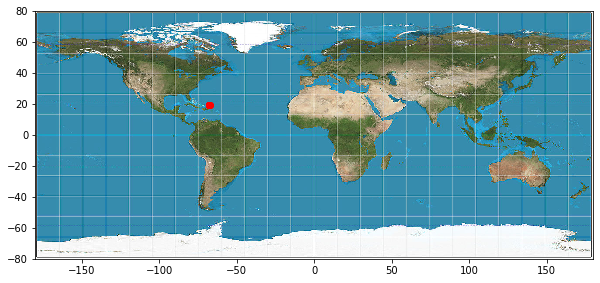

In [23]:
img = plt.imread("Archivos/Equirectangular.jpg")
#320, 161 

fig, ax = plt.subplots(figsize=(10,5.03125))
ax.imshow(img, extent=[-180, 180, -80, 80])
plt.scatter(ISSdataFrame["Longitud"],ISSdataFrame["Latitud"], c = "red") #-86.3791, -51.2624

In [27]:
#Hace una tabla con longitud y latitud de la estacion cada 10 segundos 
def MapaISS(tiempoDeSegumiento,intervaloDeMedicion):
    '''
    Imprime un bello mapa del ISS
    INPUT: 
    > tiempoDeSegumiento:  minutos.
        > tiempo en el cual se estará rastreando la ISS
    > intervaloDeMedicion: segundos.
        > Cuada cuando se obtiene datos de su posición
        
    OUTPUT:
    > ISSdataFrame
        > Tabla con datos de longitud y latitud de la ISS
    '''
    
    lonLista = []
    latLista = []
    duracion = int(tiempoDeSegumiento*60/intervaloDeMedicion)
    for i in range(duracion):
        tuplaPos = ISS_Position()
        print(tuplaPos[0])
        print(tuplaPos[1])
        lonLista.append(tuplaPos[0])#Longitud
        latLista.append(tuplaPos[1])#Longitud
        time.sleep(intervaloDeMedicion)#Actualizar cada 10 segundos
    ISSdataFrame = pd.DataFrame(list(zip(lonLista,latLista)))
    ISSdataFrame.columns =  ['Longitud','Latitud']
    ISSdataFrame = ISSdataFrame.astype(float)
    
    #Dibujar Mapa
    img = plt.imread("Archivos/Equirectangular.jpg")
    fig, ax = plt.subplots(figsize=(10,5.03125))
    ax.imshow(img, extent=[-180, 180, -80, 80])
    plt.scatter(ISSdataFrame["Longitud"],ISSdataFrame["Latitud"], c = "yellow")
    
    return ISSdataFrame

-10.8153
50.8146
-9.8446
50.9306
-8.8689
51.0378
-7.8397
51.1408
-6.8553
51.2297
-5.8176
51.3134
-4.8258
51.3838
-3.8311
51.4450
-2.7839
51.4994
-1.7844
51.5418
-0.7831
51.5750
0.2696
51.5998


,Longitud,Latitud
0,-10.8153,50.8146
1,-9.8446,50.9306
2,-8.8689,51.0378
3,-7.8397,51.1408
4,-6.8553,51.2297
5,-5.8176,51.3134
6,-4.8258,51.3838
7,-3.8311,51.4450
8,-2.7839,51.4994
9,-1.7844,51.5418


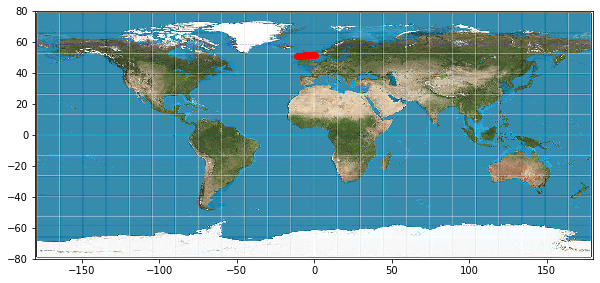

In [26]:
MapaISS(2,10)

19.1958
50.2704
21.0721
49.9454
22.9209
49.5878
24.7853
49.1883
26.5729
48.7674
28.3285
48.3166
30.0930
47.8248
31.7802
47.3168
33.4325
46.7820
35.0899
46.2071
36.6710
45.6213
38.2170
45.0118
39.7652
44.3635
41.2406
43.7091
42.6817
43.0339
44.1238
42.3213
45.4973
41.6069
46.8382
40.8746
48.1798
40.1062
49.4576
39.3400
50.7056
38.5583
51.9545
37.7418
53.1446
36.9311
54.3076
36.1070
55.4725
35.2492
56.5835
34.4003
57.6703
33.5399
58.7601
32.6468
59.8008
31.7651
60.8199
30.8739
61.8431
29.9509
62.8216
29.0417
63.7813
28.1244
64.7466
27.1759
65.6711
26.2433
66.5794
25.3039
67.4945
24.3340
68.3724
23.3818
69.2365
22.4238
70.1085
21.4363
70.9467
20.4677
71.7733
19.4944
72.6092
18.4921
73.4143
17.5100
74.2097
16.5242
75.0156
15.5099
75.7935
14.5170
76.5636
13.5210
77.3454
12.4972
78.1015
11.4958
78.8516
10.4920
79.6148
9.4610
80.3544
8.4532
81.0896
7.4439
81.8392
6.4078
82.5673
5.3957
83.2925
4.3827
84.0335
3.3435
84.7548
2.3290
85.4749
1.3139
86.2122
0.2735
86.9313
-0.7415
87.6508
-1.7564
88

,Longitud,Latitud
0,19.1958,50.2704
1,21.0721,49.9454
2,22.9209,49.5878
3,24.7853,49.1883
4,26.5729,48.7674
5,28.3285,48.3166
6,30.0930,47.8248
7,31.7802,47.3168
8,33.4325,46.7820
9,35.0899,46.2071


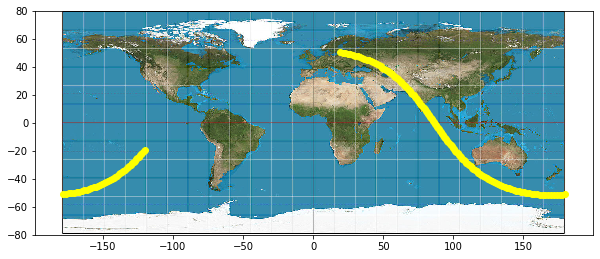

In [28]:
MapaISS(60,20) #Obtener información por una hora cada 20 segundos
#Hasta el final esta el mapa de una hora

In [8]:
#Agregado de lo que no subí ayer en la tarea
iss_merida = iss_passtimes(20.967780, -89.624250)
iss_merida

{'message': 'success',
 'request': {'altitude': 100,
  'datetime': 1568857187,
  'latitude': 20.96778,
  'longitude': -89.62425,
  'passes': 5},
 'response': [{'duration': 384, 'risetime': 1568880402},
  {'duration': 649, 'risetime': 1568886097},
  {'duration': 350, 'risetime': 1568892024},
  {'duration': 575, 'risetime': 1568934221},
  {'duration': 597, 'risetime': 1568940005}]}

In [9]:
avistamientosISS_DataFrame = pd.read_json(json.dumps(iss_merida['response']), orient = 'records')

#Crear nuevas columnas con longitud y latitud
avistamientosISS_DataFrame["latitude"] = iss_merida['request']['longitude']
avistamientosISS_DataFrame["longitude"] = iss_merida['request']['latitude']

#Crear tabla
avistamientosISS_DataFrame

,duration,risetime,latitude,longitude
0,384,1568880402,-89.62425,20.96778
1,649,1568886097,-89.62425,20.96778
2,350,1568892024,-89.62425,20.96778
3,575,1568934221,-89.62425,20.96778
4,597,1568940005,-89.62425,20.96778
